In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline



In [3]:
df=pd.read_csv(r"C:\Users\KİRA\Downloads\MY2010-2014 Fuel Consumption Ratings 5-cycle.csv")
df=df.iloc[:,:10]
df.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,CO2 EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3


In [4]:
columns=df.columns
print(columns)

cdf=df[["ENGINE SIZE","CYLINDERS","FUEL CONSUMPTION","CO2 EMISSIONS "]]
cdf.head()

Index(['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE',
       'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION',
       'CO2 EMISSIONS '],
      dtype='object')


,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,CO2 EMISSIONS
0,2.0,4,10.9,7.8
1,2.0,4,10.0,7.6
2,2.0,4,11.6,8.1
3,3.7,6,14.8,11.3
4,2.3,4,13.2,10.3


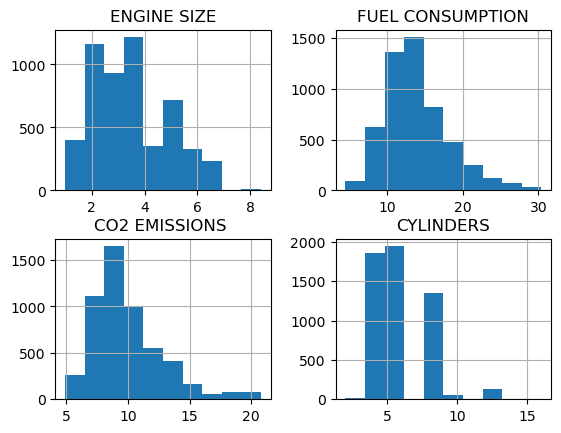

In [5]:

viz=cdf[["ENGINE SIZE","FUEL CONSUMPTION","CO2 EMISSIONS ","CYLINDERS"]]
viz.hist()
plt.show()


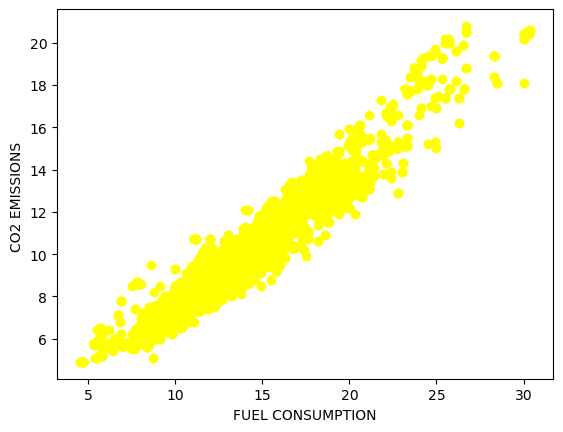

In [10]:
plt.scatter(cdf["FUEL CONSUMPTION"],cdf["CO2 EMISSIONS "] ,color="yellow")
plt.xlabel("FUEL CONSUMPTION")
plt.ylabel("CO2 EMISSIONS ")
plt.show()

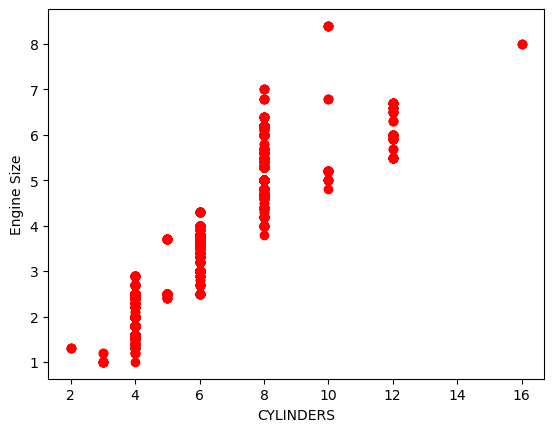

In [14]:
plt.scatter(cdf["CYLINDERS"],cdf["ENGINE SIZE"],color="red")
plt.xlabel("CYLINDERS")
plt.ylabel("Engine Size")
plt.show()

In [17]:
mask=np.random.rand(len(df))<0.8
train_data=cdf[mask]
test_data=cdf[~mask]

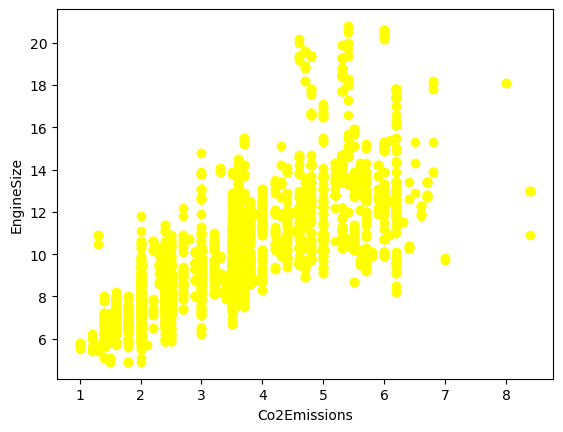

In [21]:
plt.scatter(train_data["ENGINE SIZE"],train_data["CO2 EMISSIONS "],color="yellow")
plt.xlabel("Co2Emissions")
plt.ylabel("EngineSize")
plt.show()

In [23]:
from sklearn import linear_model
regression=linear_model.LinearRegression()
train_x=np.asanyarray(train_data[["ENGINE SIZE"]])
train_y=np.asanyarray(train_data["CO2 EMISSIONS "])
regression.fit(train_x,train_y)
print("coefficients:",regression.coef_)
print("intercep:",regression.intercept_)

coefficients: [1.54545391]
intercep: 4.528344347904928


Text(0, 0.5, 'Emission')

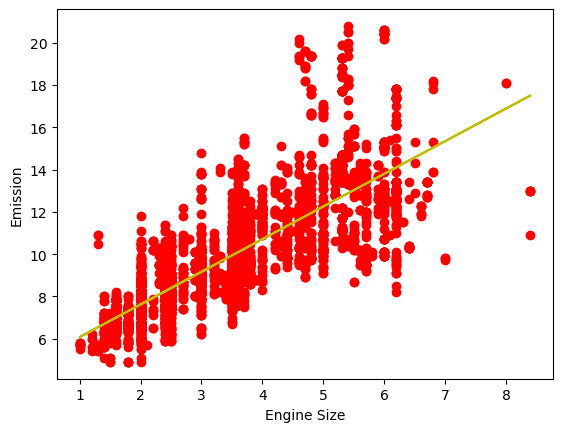

In [29]:
plt.scatter(train_data["ENGINE SIZE"],train_data["CO2 EMISSIONS "],color="red")
plt.plot(train_x, regression.coef_[0] * train_x + regression.intercept_, "-y")
plt.xlabel("Engine Size")
plt.ylabel("Emission")


In [38]:
from sklearn.metrics import r2_score

test_x=np.asanyarray(test_data[["ENGINE SIZE"]])
test_y=np.asanyarray(test_data[["CO2 EMISSIONS "]])
predictions=regression.predict(test_x)

In [39]:
print("mean absolute error:%.2f" %np.mean(np.absolute(predictions-test_y)))
print("residual sum of square(mse):%.2f" %np.mean((predictions-test_y)))
print("R2-score:%.2f" %r2_score(test_y,predictions))

mean absolute error:2.75
residual sum of square(mse):-0.04
R2-score:0.62


In [42]:
#lets look at relationship between CYLINDERS AND CO2 EMISSIONS
trainx_=np.asanyarray(train_data[["CYLINDERS"]])
testx_=np.asanyarray(test_data[["CYLINDERS"]])


In [43]:
new_regression=linear_model.LinearRegression()
new_regression.fit(trainx_,train_y)

LinearRegression()

In [44]:
predictions=new_regression.predict(testx_)

In [46]:
print("mean absoluter error:%.2f" %np.mean(np.absolute(predictions-test_y)))

mean absoluter error:2.68
